# Intake catalog example

We would like to more easily interact with the datasets available at [data.lacity.org](data.lacity.org)
and [geohub.lacity.org](geohub.lacity.org).

These data portals have catalogs available at the `data.json` endpoints, which are specified in the
DCAT (https://project-open-data.cio.gov/v1.1/schema) catalog format.

We have been working on an `intake` catalog source that adapts a DCAT catalog to an intake catalog,
along with specifying how to load datasets.

Begin by importing `intake`:

In [1]:
%matplotlib inline
import intake

The DCAT catalogs for the City of Los Angeles open data portals are specified in [catalog.yml](./catalog.yml).
We can optionally give an `item` argument, which will filter the catalog to only include the selected items.

We use `intake` to load the catalog into memory:

In [2]:
catalog = intake.open_catalog('catalog.yml')
print(list(catalog))

['la_open_data', 'la_geohub']


Let's load some data relating to Los Angeles' bike infrastructure.
The GeoHub dataset has already had some entries selected:

In [3]:
geohub = catalog.la_geohub
open_data = catalog.la_open_data
for key, entry in geohub.items():
    display(entry)

http://geohub.lacity.org/datasets/2602345a7a8549518e8e3c873368c1d9_0
City of Los Angeles Bikeways
<p>City of Los Angeles
network of on-street and off-street bikeways. Included Bike Path Class 1, Bike
Lane Class 2, Bike Route/ Sharrow Class 3, Protected Bike Lanes Class 4.</p>

http://geohub.lacity.org/datasets/3b022cced9704108af157d3d5eedb268_2
Bike Racks
Bike Corrals on-street bicycle parking facility that can accommodate many more bicycles than a typical sidewalk rack. 

Bike Racks installed where possible in the public right-of-way bike parking as close to building entrances as possible to increase security and make travelling by bike convenient. 

Bike Repair stations provide basic bicycle repair capability to business districts and corridors that cater to bicyclists. Repair Stations feature a stand to mount a bicycle and contain the basic tools needed to perform do-it-yourself bicycle repair including screwdrivers, wrenches, and hex tools. Repair stations also feature a heavy duty bicycle pump with a pump head for both schrader and presta valves and connect users to detailed instructions for a wide variety of bicycle repairs-just a smart phone scan away.

http://geohub.lacity.org/datasets/09f503229d37414a8e67a7b6ceb9ec43_7
City Boundary
City Boundary

The open data catalog, on the other hand, is pretty long:

In [4]:
len(list(open_data.items()))

292

We can make this shorter by filtering it for the "boundary" keyword:

In [5]:
open_data_boundary = open_data.search('boundary')
len(list(open_data_boundary))

3

In [6]:
for entry_id, entry in open_data_boundary.items():
    display(entry)

https://data.lacity.org/api/views/paqi-j4yv
Area Planning Commission
Area Planning Commission Boundary

https://data.lacity.org/api/views/ppge-zfr4
City Boundary of Los Angeles
Official City Boundary for the City of Los Angeles created and maintained by the Bureau of Engineering / GIS Mapping Division.

https://data.lacity.org/api/views/vu99-34t2
Port of Los Angeles Point of Interest
Location of lighthouses, museums, public arts, parks, restrooms and special interest within Port of Los Angeles' administrative boundary.  Data will be refresh when there's a revision to the current points of interest.

Much more managable.

In [7]:
bike_racks_id = 'http://geohub.lacity.org/datasets/3b022cced9704108af157d3d5eedb268_2'
bike_racks = geohub[bike_racks_id].read()

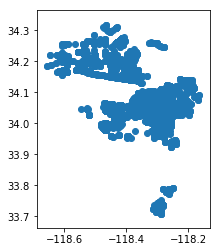

In [8]:
bike_racks.plot()